In [1]:
import pandas as pd
import os 
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
!pip install plotly

In [3]:
import pandas as pd
import plotly.graph_objects as go

## Fetch Data

In [4]:
txtfiles = []
for file in glob.glob("D:/crawler/crawler/Tweets/final/*"):
    txtfiles.append(file)
arr = next(os.walk('D:/crawler/crawler/Tweets/final/'))[2]

In [5]:
len(arr)

9775

In [6]:
df = pd.DataFrame(columns=['tweetid'])
for filename in glob.glob("D:/crawler/crawler/Tweets/final/*"):
  csv = pd.read_csv(filename) 
  csv['tweetid'] = filename.split('/')[4]
  df = df.append(csv)

In [7]:
df.columns = ['id_str', 'likeduser']

In [8]:
df['id_str'] = df['id_str'].str.replace("\\",'')

<ipython-input-8-bc2d98a3034f>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['id_str'] = df['id_str'].str.replace("\\",'')


In [9]:
df['id_str'] = df['id_str'].str.replace("final",'')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196295 entries, 0 to 0
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id_str     196295 non-null  object
 1   likeduser  196295 non-null  object
dtypes: object(2)
memory usage: 4.5+ MB


In [27]:
df

,id_str,likeduser
0,1344795503251357700,@d_royalti
1,1344795503251357700,@dahliaratchett
2,1344795503251357700,@1coolwhipp
3,1344795503251357700,@catheri40650110
4,1344795503251357700,@nefelibatasays
...,...,...
2,1386351738127585288,@heipsansaa
0,1386368132470788102,@Barbara72346664
1,1386368132470788102,@greybalance1
2,1386368132470788102,@Ral314


In [31]:
df = df.reset_index()

In [11]:
test = df['likeduser'].value_counts()

In [116]:
## Top 50 Users

In [12]:
df_value_counts = test.reset_index()
df_value_counts.columns = ['unique_values', 'counts']

In [13]:
df_value_counts

,unique_values,counts
0,@Melinda15199317,939
1,@dahliaratchett,860
2,@Aishacat5,849
3,@bluecro90230758,760
4,@la77465262,718
...,...,...
56629,@deehphotography,1
56630,@_lavienroze,1
56631,@Ben_West42,1
56632,@artist_flop,1


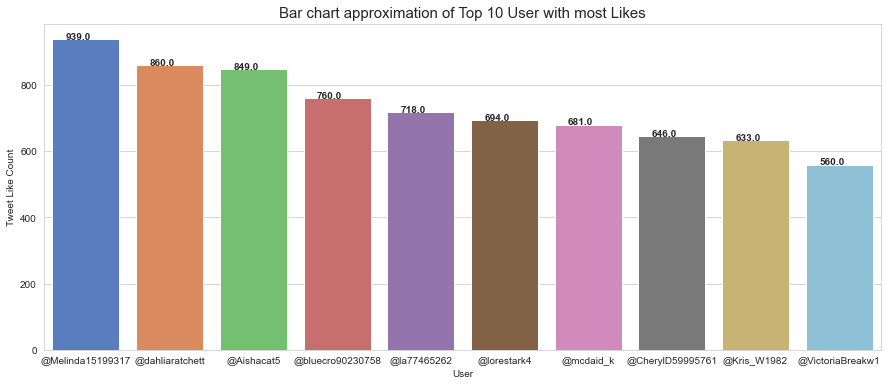

In [15]:
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(15,6))
ax = sns.barplot(x=df_value_counts['unique_values'][0:10], y=df_value_counts['counts'][0:10], data=df_value_counts, ci=None, palette="muted",orient='v', )
ax.set_title("Bar chart approximation of Top 10 User with most Likes", fontsize=15)
ax.set_xlabel ("User")
ax.set_ylabel ("Tweet Like Count")
for rect in ax.patches:
    ax.text (rect.get_x()  + rect.get_width() /5,rect.get_height(),"%.1f"% rect.get_height(), weight='bold' )
bar.savefig("Tweet10.png");

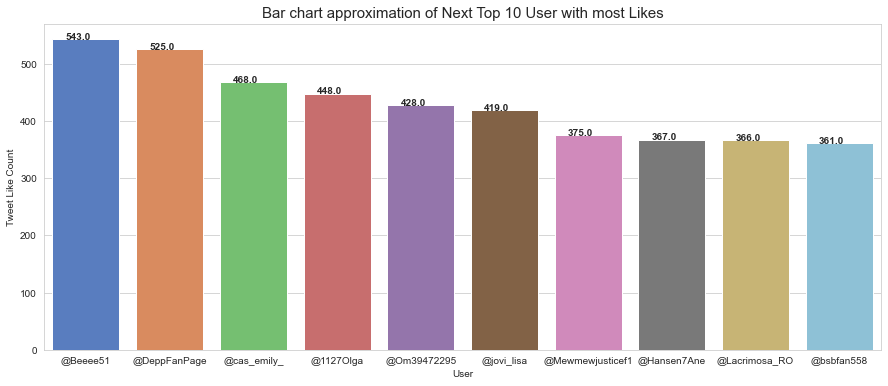

In [14]:
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(15,6))
ax = sns.barplot(x=df_value_counts['unique_values'][10:20], y=df_value_counts['counts'][10:20], data=df_value_counts, ci=None, palette="muted",orient='v', )
ax.set_title("Bar chart approximation of Next Top 10 User with most Likes", fontsize=15)
ax.set_xlabel ("User")
ax.set_ylabel ("Tweet Like Count")
for rect in ax.patches:
    ax.text (rect.get_x()  + rect.get_width() /5,rect.get_height(),"%.1f"% rect.get_height(), weight='bold' )
bar.savefig("Tweet20.png");

## Load Tweets Data Full

In [15]:
df1 = pd.read_csv('C:/Users/USER PC/Downloads/twitter/_Twitter - Data/tweets_2021.csv',low_memory=False) 

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228687 entries, 0 to 228686
Data columns (total 39 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   id_str                                   228687 non-null  object 
 1   created_at                               228687 non-null  object 
 2   full_text                                228687 non-null  object 
 3   lang                                     228686 non-null  object 
 4   in_reply_to_status_id_str                75799 non-null   object 
 5   in_reply_to_user_id                      78962 non-null   object 
 6   entities.hashtags                        228687 non-null  object 
 7   entities.media                           45451 non-null   object 
 8   entities.symbols                         228687 non-null  object 
 9   entities.urls                            228687 non-null  object 
 10  entities.user_mentions          

In [17]:
df3 = pd.merge(df, df1, on='id_str')

In [18]:
df3.head()

,id_str,likeduser,created_at,full_text,lang,in_reply_to_status_id_str,in_reply_to_user_id,entities.hashtags,entities.media,entities.symbols,...,user.friends_count,user.lang,user.location,user.name,user.screen_name,user.profile_banner_url,user.profile_image_url,user.statuses_count,user.url,user.verified
0,1344795503251357700,@d_royalti,2021-01-01 00:00:07+00:00,May 2021 bring much happiness &amp; good healt...,en,NaN,NaN,"[{'indices': [214, 235], 'text': 'JusticeForJo...","[{'original_info': {'width': 220, 'height': 12...",[],...,362.0,NaN,NaN,BeCurious,1InquiringMind,https://pbs.twimg.com/profile_banners/12842191...,http://pbs.twimg.com/profile_images/1380136486...,5879.0,NaN,False
1,1344795503251357700,@dahliaratchett,2021-01-01 00:00:07+00:00,May 2021 bring much happiness &amp; good healt...,en,NaN,NaN,"[{'indices': [214, 235], 'text': 'JusticeForJo...","[{'original_info': {'width': 220, 'height': 12...",[],...,362.0,NaN,NaN,BeCurious,1InquiringMind,https://pbs.twimg.com/profile_banners/12842191...,http://pbs.twimg.com/profile_images/1380136486...,5879.0,NaN,False
2,1344795503251357700,@1coolwhipp,2021-01-01 00:00:07+00:00,May 2021 bring much happiness &amp; good healt...,en,NaN,NaN,"[{'indices': [214, 235], 'text': 'JusticeForJo...","[{'original_info': {'width': 220, 'height': 12...",[],...,362.0,NaN,NaN,BeCurious,1InquiringMind,https://pbs.twimg.com/profile_banners/12842191...,http://pbs.twimg.com/profile_images/1380136486...,5879.0,NaN,False
3,1344795503251357700,@catheri40650110,2021-01-01 00:00:07+00:00,May 2021 bring much happiness &amp; good healt...,en,NaN,NaN,"[{'indices': [214, 235], 'text': 'JusticeForJo...","[{'original_info': {'width': 220, 'height': 12...",[],...,362.0,NaN,NaN,BeCurious,1InquiringMind,https://pbs.twimg.com/profile_banners/12842191...,http://pbs.twimg.com/profile_images/1380136486...,5879.0,NaN,False
4,1344795503251357700,@nefelibatasays,2021-01-01 00:00:07+00:00,May 2021 bring much happiness &amp; good healt...,en,NaN,NaN,"[{'indices': [214, 235], 'text': 'JusticeForJo...","[{'original_info': {'width': 220, 'height': 12...",[],...,362.0,NaN,NaN,BeCurious,1InquiringMind,https://pbs.twimg.com/profile_banners/12842191...,http://pbs.twimg.com/profile_images/1380136486...,5879.0,NaN,False


In [20]:
df3.to_csv('all_tweets.csv')

NameError: name 'df3' is not defined

In [21]:
def splitcsv(filename):
    count = 0
    for i,chunk in enumerate(pd.read_csv(filename, chunksize=5000)):
        count = count + 1
        chunk.to_csv('all_tweets_twitter_chunk{}.csv'.format(i), index=False)
        print(count)

In [22]:
load = 'all_tweets.csv'

In [23]:
splitcsv(load)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40


In [ ]:
def mergecsv(extension):
    all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
    # combine all files in the list
    combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames])
    # export to csv
    combined_csv.to_csv("combinedtwitter_csv.csv", index=False, encoding='utf-8-sig')

extension = 'csv'
mergecsv(extension)

In [ ]:
users = df3['likeduser'].unique()

In [24]:
names = pd.DataFrame(users, columns = ['names'])

In [26]:
total_users = len(names)
print("Total users that liked tweets",total_users)

Total users that liked tweets 56634


## merger in single

In [25]:
names.to_csv('names.csv')

In [63]:
!pip install pandasql

In [64]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [65]:
df

,index,id_str,likeduser
0,0,1344795503251357700,@d_royalti
1,1,1344795503251357700,@dahliaratchett
2,2,1344795503251357700,@1coolwhipp
3,3,1344795503251357700,@catheri40650110
4,4,1344795503251357700,@nefelibatasays
...,...,...,...
196290,2,1386351738127585288,@heipsansaa
196291,0,1386368132470788102,@Barbara72346664
196292,1,1386368132470788102,@greybalance1
196293,2,1386368132470788102,@Ral314


In [70]:
newdf = pysqldf('''SELECT id_str, GROUP_CONCAT("likeduser") as likeduser from df GROUP BY id_str''')
newdf

,id_str,likeduser
0,1344795503251357700,"@d_royalti,@dahliaratchett,@1coolwhipp,@cather..."
1,1344797054904754178,"@SarahMkII1,@mamwidges,@CathieBagnall,@InValid..."
2,1344797300640477184,"@MundstockDebora,@juedroppy,@IDreamOfDepp,@dah..."
3,1344797340432035845,"@dahliaratchett,@SarahMkII1,@Rosie58087464,@sa..."
4,1344798174007992320,@cindy_york98
...,...,...
9654,1386255233278480385,"@Melanie66896125,@DJusticeforj,@MarciaRodmell"
9655,1386297690632462347,"@bluecro90230758,@virgy_sparrow,@JohnnyDeppLat..."
9656,1386351738127585288,"@la77465262,@SweetChastityYT,@heipsansaa"
9657,1386368132470788102,"@Barbara72346664,@greybalance1,@Ral314"


In [71]:
df3_newdf = pd.merge(newdf, df1, on='id_str')
df3_newdf

,id_str,likeduser,created_at,full_text,lang,in_reply_to_status_id_str,in_reply_to_user_id,entities.hashtags,entities.media,entities.symbols,...,user.friends_count,user.lang,user.location,user.name,user.screen_name,user.profile_banner_url,user.profile_image_url,user.statuses_count,user.url,user.verified
0,1344795503251357700,"@d_royalti,@dahliaratchett,@1coolwhipp,@cather...",2021-01-01 00:00:07+00:00,May 2021 bring much happiness &amp; good healt...,en,NaN,NaN,"[{'indices': [214, 235], 'text': 'JusticeForJo...","[{'original_info': {'width': 220, 'height': 12...",[],...,362.0,NaN,NaN,BeCurious,1InquiringMind,https://pbs.twimg.com/profile_banners/12842191...,http://pbs.twimg.com/profile_images/1380136486...,5879.0,NaN,False
1,1344797054904754178,"@SarahMkII1,@mamwidges,@CathieBagnall,@InValid...",2021-01-01 00:06:17+00:00,Happy New Year to all you Twitter folk.\n\nI'm...,en,NaN,NaN,"[{'indices': [144, 165], 'text': 'JusticeForJo...","[{'original_info': {'width': 750, 'focus_rects...",[],...,1397.0,NaN,Think Robin Hood,Louise Hatfield,LouiseHatfiel16,https://pbs.twimg.com/profile_banners/86995317...,http://pbs.twimg.com/profile_images/1379787635...,24130.0,NaN,False
2,1344797300640477184,"@MundstockDebora,@juedroppy,@IDreamOfDepp,@dah...",2021-01-01 00:07:16+00:00,"""Though the world is in mourning for better da...",en,NaN,NaN,"[{'indices': [257, 278], 'text': 'JusticeForJo...","[{'original_info': {'width': 1439, 'focus_rect...",[],...,2164.0,NaN,Japan 🎌,Pomta🐾,pomta5426,https://pbs.twimg.com/profile_banners/36369943...,http://pbs.twimg.com/profile_images/1357874718...,34398.0,NaN,False
3,1344797340432035845,"@dahliaratchett,@SarahMkII1,@Rosie58087464,@sa...",2021-01-01 00:07:25+00:00,2021 the year #JusticeForJohnnyDepp will happen!,en,NaN,NaN,"[{'indices': [14, 35], 'text': 'JusticeForJohn...",NaN,[],...,583.0,NaN,"North West, England",Cherry B - 💙-💜-❤,thatNortherner1,https://pbs.twimg.com/profile_banners/82901976...,http://pbs.twimg.com/profile_images/1373982756...,53340.0,https://t.co/JRZ7vAjSH5,False
4,1344798174007992320,@cindy_york98,2021-01-01 00:10:44+00:00,Io does know we can see he's clearly deleting ...,en,NaN,NaN,"[{'indices': [136, 157], 'text': 'JusticeForJo...","[{'original_info': {'width': 970, 'focus_rects...",[],...,497.0,NaN,somewhere in Ohio,Aliza (Pronounced Aleeza),Thefickle_muse,https://pbs.twimg.com/profile_banners/11728484...,http://pbs.twimg.com/profile_images/1336232213...,1192.0,https://t.co/2N2zoi5NaU,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,1386255233278480385,"@Melanie66896125,@DJusticeforj,@MarciaRodmell",2021-04-25 09:46:17+00:00,#JusticeForJohnnyDepp ⚖️\n\n#AmberHeardIsAnAbu...,und,NaN,NaN,"[{'indices': [0, 21], 'text': 'JusticeForJohnn...",NaN,[],...,4991.0,NaN,"Islington, London",Teri Carson ☠️ 🇮🇪 💀 🇨🇮 ☠️,TeriCarson,https://pbs.twimg.com/profile_banners/23237739...,http://pbs.twimg.com/profile_images/1380958530...,89619.0,NaN,False
9655,1386297690632462347,"@bluecro90230758,@virgy_sparrow,@JohnnyDeppLat...",2021-04-25 12:35:00+00:00,'Minamata' by Andrew Levitas starring Johnny D...,en,NaN,NaN,"[{'indices': [159, 180], 'text': 'JusticeForJo...","[{'original_info': {'width': 1000, 'focus_rect...",[],...,282.0,NaN,Flanders,Support Johnny Depp ♡ Stream City of Lies 🏆,MyGrindelwald,https://pbs.twimg.com/profile_banners/45832812...,http://pbs.twimg.com/profile_images/1383054990...,206677.0,https://t.co/0rDo6do7uU,False
9656,1386351738127585288,"@la77465262,@SweetChastityYT,@heipsansaa",2021-04-25 16:09:46+00:00,#JusticeForJohnnyDepp ⚖️\n\n#AmberHeardIsAnAbu...,und,NaN,NaN,"[{'indices': [0, 21], 'text': 'JusticeForJohnn...",NaN,[],...,4991.0,NaN,"Islington, London",Teri Carson ☠️ 🇮🇪 💀 🇨🇮 ☠️,TeriCarson,https://pbs.twimg.com/profile_banners/23237739...,http://pbs.twimg.com/profile_images/1380958530...,89619.0,NaN,False
9657,1386368132470788102,"@Barbara72346664,@greybalance1,@Ral314",2021-04-25 17:14:54+00:00,#JusticeForJohnnyDepp ⚖️\n\n#AmberHea

In [72]:
df3_newdf.to_csv('twitters with liked users.csv')